실습 데이터 : https://openmv.net/info/travel-times




In [ ]:
import pandas as pd
import io
import requests

url = 'https://openmv.net/file/travel-times.csv'
df = pd.read_csv(url)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(6), object(7)
memory usage: 20.9+ KB
None
       Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0  1/6/2012     16:37     Friday    Home     51.29     127.4      78.3   
1  1/6/2012   

In [ ]:
# 결측치 개수 확인
print(df.isnull().sum())

# 결측치 비율 확인
missing_ratio = df.isnull().mean()
print(missing_ratio)


Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64
Date              0.000000
StartTime         0.000000
DayOfWeek         0.000000
GoingTo           0.000000
Distance          0.000000
MaxSpeed          0.000000
AvgSpeed          0.000000
AvgMovingSpeed    0.000000
FuelEconomy       0.082927
TotalTime         0.000000
MovingTime        0.000000
Take407All        0.000000
Comments          0.882927
dtype: float64


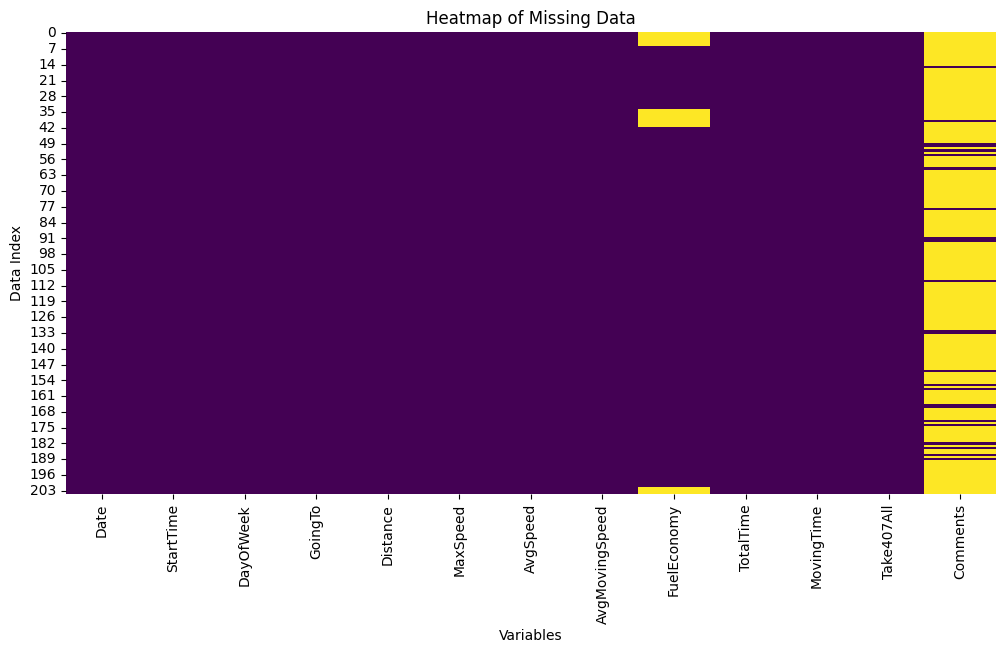

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xlabel('Variables')
plt.ylabel('Data Index')
plt.title('Heatmap of Missing Data')
plt.show()

In [ ]:
!pip install klib

GridSpec(6, 6)

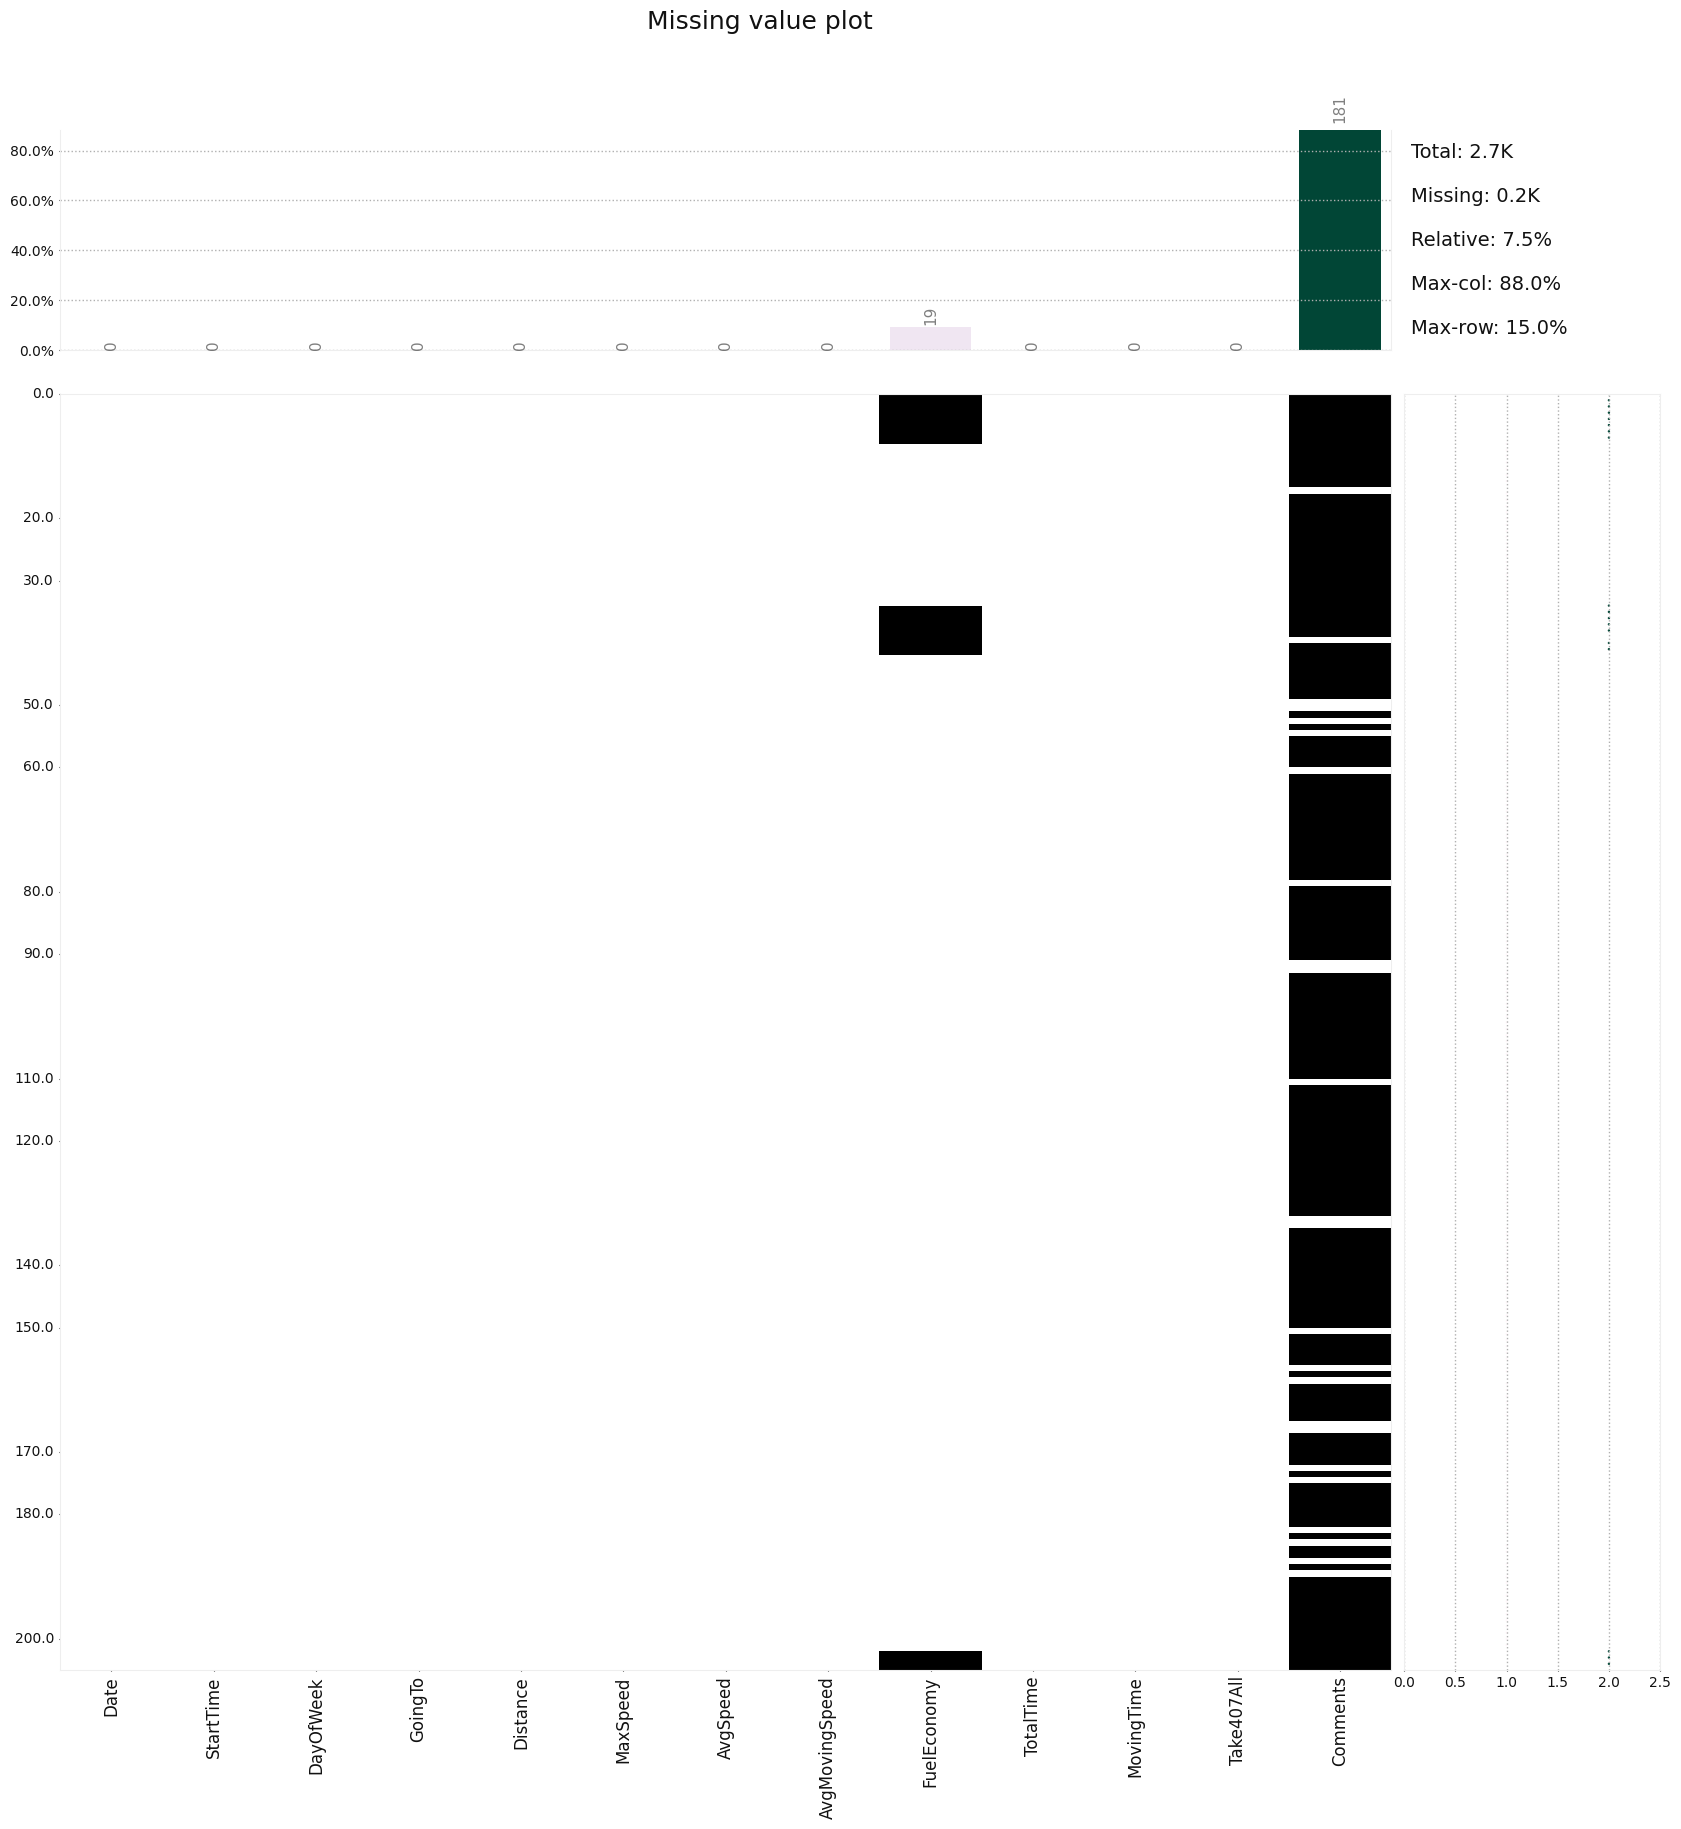

In [ ]:
import klib

klib.missingval_plot(df)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

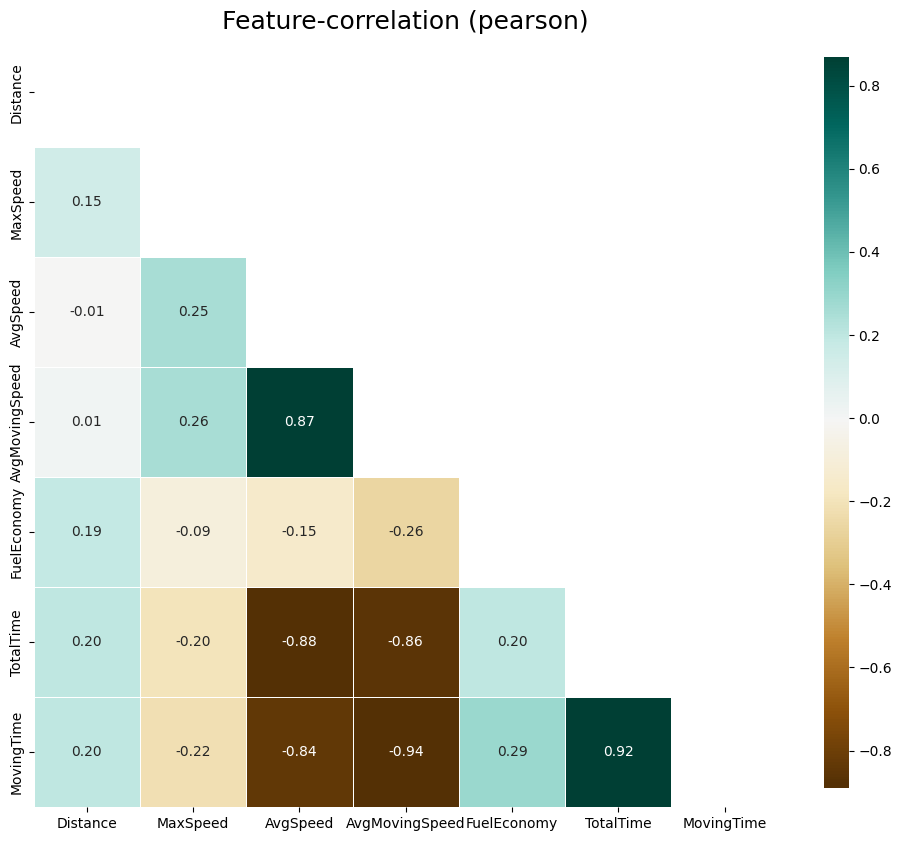

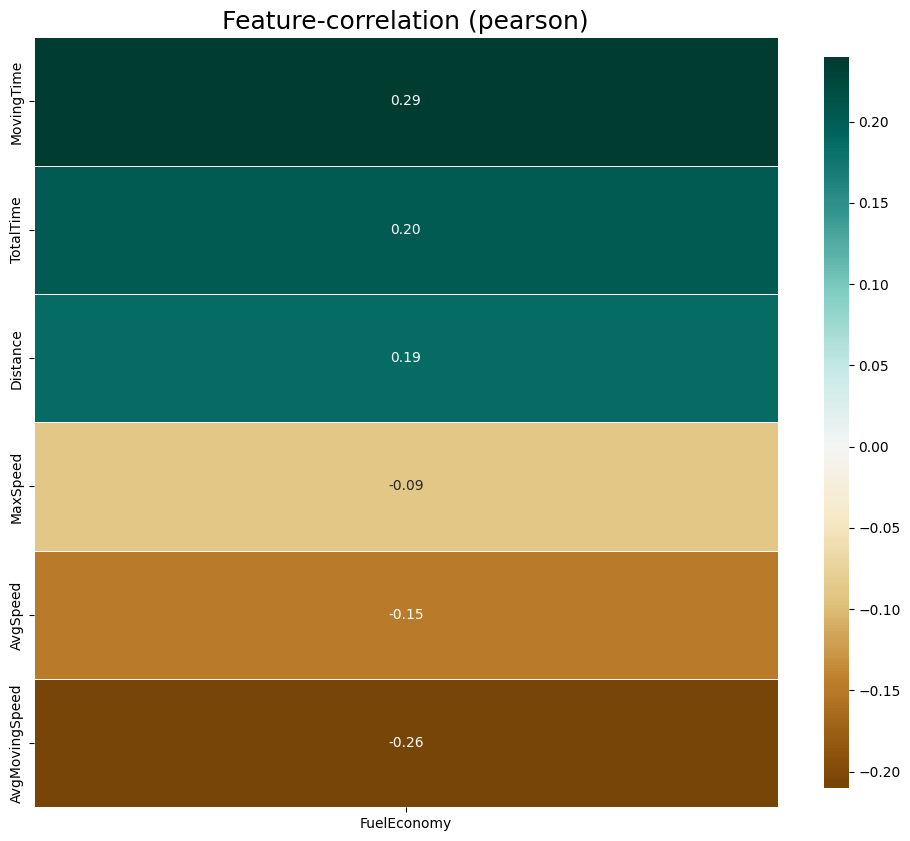

In [ ]:
df['FuelEconomy'] = pd.to_numeric(df['FuelEconomy'], errors='coerce')

klib.corr_plot(df)
klib.corr_plot(df, target='FuelEconomy')

<Axes: xlabel='FuelEconomy', ylabel='Density'>

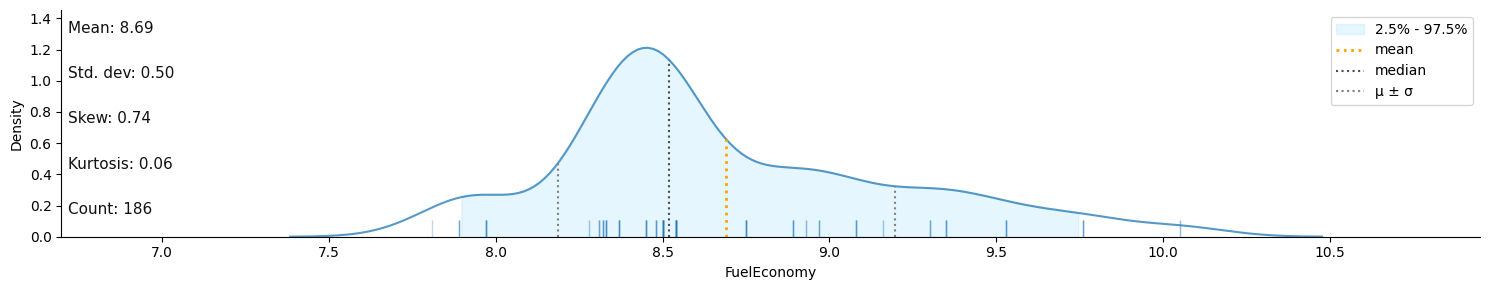

In [ ]:
klib.dist_plot(df['FuelEconomy'])

In [ ]:
print(df.info())
df_dropped = df.dropna()
print(df_dropped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(6), object(7)
memory usage: 20.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 15 to 189
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------      

In [ ]:
print(df.info())
df_droppped = df.dropna(subset=['FuelEconomy', 'Date'])
print(df_droppped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(6), object(7)
memory usage: 20.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 6 to 201
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------      

In [ ]:
df_filled = df.fillna(0)
df_filled_2 = df.fillna(100)

print('원본:{}, 대치(0):{}, 대치(100):{})'.format(df['FuelEconomy'].mean(), df_filled['FuelEconomy'].mean(), df_filled_2['FuelEconomy'].mean()))

원본:8.690591397849461, 대치(0):7.885121951219511, 대치(100):17.153414634146344)


In [ ]:
from sklearn.impute import SimpleImputer

df_imputed = df.copy()
imputer = SimpleImputer(strategy='mean')
df_imputed['FuelEconomy'] = imputer.fit_transform(df[['FuelEconomy']])

print('원본:{}, 대치(평균):{})'.format(df['FuelEconomy'].mean(), df_imputed['FuelEconomy'].mean()))

원본:8.690591397849461, 대치(평균):8.690591397849463)


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# 결측치가 존재하는 특성들(종속변수)
missing_vars = ['FuelEconomy']
# 결측치를 예측하기 위한 특성들(독립변수)
predictor_vars = ['MovingTime', 'AvgMovingSpeed']

imputer = IterativeImputer(estimator=BayesianRidge())

imputed_df = imputer.fit_transform(df[missing_vars + predictor_vars])
df_imputed = df.copy()
df_imputed['FuelEconomy'] = imputed_df[:, 0]

print(df.head())
print(df_imputed.head())

       Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0  1/6/2012     16:37     Friday    Home     51.29     127.4      78.3   
1  1/6/2012     08:20     Friday     GSK     51.63     130.3      81.8   
2  1/4/2012     16:17  Wednesday    Home     51.27     127.4      82.0   
3  1/4/2012     07:53  Wednesday     GSK     49.17     132.3      74.2   
4  1/3/2012     18:57    Tuesday    Home     51.15     136.2      83.4   

   AvgMovingSpeed  FuelEconomy  TotalTime  MovingTime Take407All Comments  
0            84.8          NaN       39.3        36.3         No      NaN  
1            88.9          NaN       37.9        34.9         No      NaN  
2            85.8          NaN       37.5        35.9         No      NaN  
3            82.9          NaN       39.8        35.6         No      NaN  
4            88.1          NaN       36.8        34.8         No      NaN  
       Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0  1/6/2012     16:37    

In [ ]:
df_bocf = df.bfill()
df_locf = df.ffill()

print(df_bocf.head())
print(df_locf.head())

       Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0  1/6/2012     16:37     Friday    Home     51.29     127.4      78.3   
1  1/6/2012     08:20     Friday     GSK     51.63     130.3      81.8   
2  1/4/2012     16:17  Wednesday    Home     51.27     127.4      82.0   
3  1/4/2012     07:53  Wednesday     GSK     49.17     132.3      74.2   
4  1/3/2012     18:57    Tuesday    Home     51.15     136.2      83.4   

   AvgMovingSpeed  FuelEconomy  TotalTime  MovingTime Take407All  \
0            84.8         8.89       39.3        36.3         No   
1            88.9         8.89       37.9        34.9         No   
2            85.8         8.89       37.5        35.9         No   
3            82.9         8.89       39.8        35.6         No   
4            88.1         8.89       36.8        34.8         No   

            Comments  
0  Put snow tires on  
1  Put snow tires on  
2  Put snow tires on  
3  Put snow tires on  
4  Put snow tires on  
       D

In [ ]:
df_interpolated = df.copy()
df_interpolated['FuelEconomy'] = df_interpolated['FuelEconomy'].interpolate()

print(df[35:42])
print(df_interpolated[35:42])

          Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
35   12/1/2011     07:24   Thursday     GSK     51.38     124.6      80.1   
36  11/30/2011     16:11  Wednesday    Home     51.09     128.7      71.5   
37  11/30/2011     07:19  Wednesday     GSK     51.71     125.6      76.3   
38  11/29/2011     16:52    Tuesday    Home     51.00     121.4      68.4   
39  11/29/2011     07:23    Tuesday     GSK     51.74     112.2      55.3   
40  11/28/2011     16:16     Monday    Home     51.05     128.2      72.4   
41  11/28/2011     07:26     Monday     GSK     51.63     127.1      71.0   

    AvgMovingSpeed  FuelEconomy  TotalTime  MovingTime Take407All    Comments  
35            84.4          NaN       38.5        36.5         No         NaN  
36            76.7          NaN       42.9        39.9         No         NaN  
37            81.8          NaN       40.7        37.9         No         NaN  
38            75.4          NaN       44.7        40.6         

In [ ]:
df_interpolated = df.copy()
df_interpolated['Date'] = pd.to_datetime(df_interpolated['Date'])
df_interpolated = df_interpolated.set_index('Date')
df_interpolated['FuelEconomy'] = df_interpolated['FuelEconomy'].interpolate(method = 'time')

print(df[35:42])
print(df_interpolated[35:42])

          Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
35   12/1/2011     07:24   Thursday     GSK     51.38     124.6      80.1   
36  11/30/2011     16:11  Wednesday    Home     51.09     128.7      71.5   
37  11/30/2011     07:19  Wednesday     GSK     51.71     125.6      76.3   
38  11/29/2011     16:52    Tuesday    Home     51.00     121.4      68.4   
39  11/29/2011     07:23    Tuesday     GSK     51.74     112.2      55.3   
40  11/28/2011     16:16     Monday    Home     51.05     128.2      72.4   
41  11/28/2011     07:26     Monday     GSK     51.63     127.1      71.0   

    AvgMovingSpeed  FuelEconomy  TotalTime  MovingTime Take407All    Comments  
35            84.4          NaN       38.5        36.5         No         NaN  
36            76.7          NaN       42.9        39.9         No         NaN  
37            81.8          NaN       40.7        37.9         No         NaN  
38            75.4          NaN       44.7        40.6         

In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=4, weights='uniform')
data = knn.fit_transform(df[['FuelEconomy']])
df_imputed = df.copy()
df_imputed['FuelEconomy'] = data

print(df_imputed.head())

       Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0  1/6/2012     16:37     Friday    Home     51.29     127.4      78.3   
1  1/6/2012     08:20     Friday     GSK     51.63     130.3      81.8   
2  1/4/2012     16:17  Wednesday    Home     51.27     127.4      82.0   
3  1/4/2012     07:53  Wednesday     GSK     49.17     132.3      74.2   
4  1/3/2012     18:57    Tuesday    Home     51.15     136.2      83.4   

   AvgMovingSpeed  FuelEconomy  TotalTime  MovingTime Take407All Comments  
0            84.8     8.690591       39.3        36.3         No      NaN  
1            88.9     8.690591       37.9        34.9         No      NaN  
2            85.8     8.690591       37.5        35.9         No      NaN  
3            82.9     8.690591       39.8        35.6         No      NaN  
4            88.1     8.690591       36.8        34.8         No      NaN  
